In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [44]:
Years = ["2001"] ### shw

Months = []
for imon in range(1,2): ### shw 13 => 3
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,10,3): ### shw 30 =>10
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2001']
['01']
['01', '04', '07']


In [45]:
N_head = 5 # first 5 lines are head lines, not include data
N_column = 4+2

Nx = 36
Ny = 21
Nz = 5
N_parcel = 3780

if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    

directory = './Lifetime/'
filename = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory+filename)

/n/home12/hongwei/HONGWEI/lagranto.era5/Simulation/Python_plot/Lifetime_2001/Lifetime_20010101.txt


In [46]:
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

Lon0 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lat0 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lev0 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

Lon1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lat1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lev1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

P_min = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime.shape

(5, 21, 36, 3, 1, 1)

In [47]:
for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            directory = './Lifetime/'
            filename = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File = open(directory+filename, 'r')
        
            Lines = File.readlines()

            # Strips the newline character
            data   = []
            data_N = []
            
            Lon_init = []
            Lat_init = []
            Lev_init = []            
            
            Lon_sink = []
            Lat_sink = []
            Lev_sink = []
            
            Lev_min = []
            
            for line in Lines:
                a = line.split(',')
                data.append(float(a[0])) # total lifetime
                
                Lon_init.append(float(a[3]))
                Lat_init.append(float(a[4]))
                Lev_init.append(float(a[5]))                
                
                Lon_sink.append(float(a[6]))
                Lat_sink.append(float(a[7]))
                Lev_sink.append(float(a[8]))
                
                Lev_min.append(float(a[9]))
#                 data_N.append(float(a[1]))
#                 data_S.append(float(a[2]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz):
                        lifetime[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        
                        Lon0[iz,iy,ix,i_day,i_month,i_year] = Lon_init[i]
                        Lat0[iz,iy,ix,i_day,i_month,i_year] = Lat_init[i]
                        Lev0[iz,iy,ix,i_day,i_month,i_year] = Lev_init[i]
                        
                        Lon1[iz,iy,ix,i_day,i_month,i_year] = Lon_sink[i]
                        Lat1[iz,iy,ix,i_day,i_month,i_year] = Lat_sink[i]
                        Lev1[iz,iy,ix,i_day,i_month,i_year] = Lev_sink[i]
                        
                        P_min[iz,iy,ix,i_day,i_month,i_year] = Lev_min[i]
                        
                        i = i+1

100%|██████████| 1/1 [00:00<00:00,  9.05it/s]


In [48]:
Pressure = [100, 75, 55, 40, 30] # hPa
Height = [16.3, 18.1, 20.1, 22.1, 23.9] # km

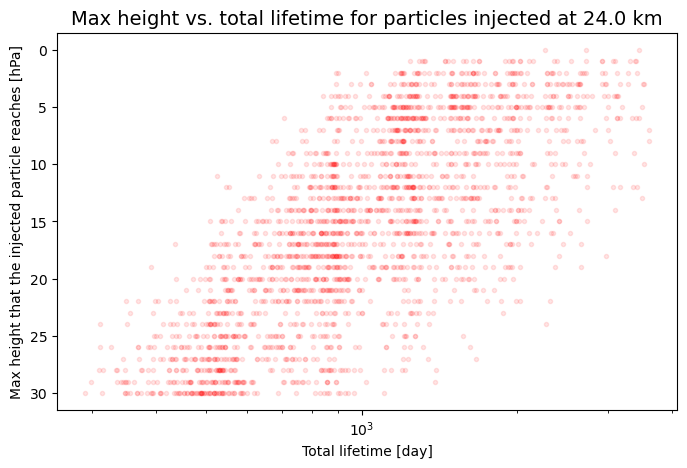

In [49]:
iz = 4

fig = plt.figure(figsize=(8,5), dpi=100)

x = lifetime[iz,:,:,:,:,:].flatten()
y = P_min[iz,:,:,:,:,:].flatten()

plt.plot(x, 
         y, 
         'r.', 
         alpha=0.1)

plt.gca().invert_yaxis()
plt.xscale('log')

plt.xlabel("Total lifetime [day]")
plt.ylabel("Max height that the injected particle reaches [hPa]")

plt.title(f'Max height vs. total lifetime for particles injected at {np.round(Height[iz])} km', fontsize=14);


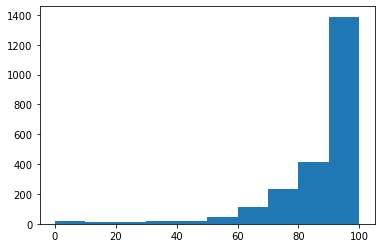

In [50]:
plt.hist(P_min[0,:,:,:,:,:].flatten());

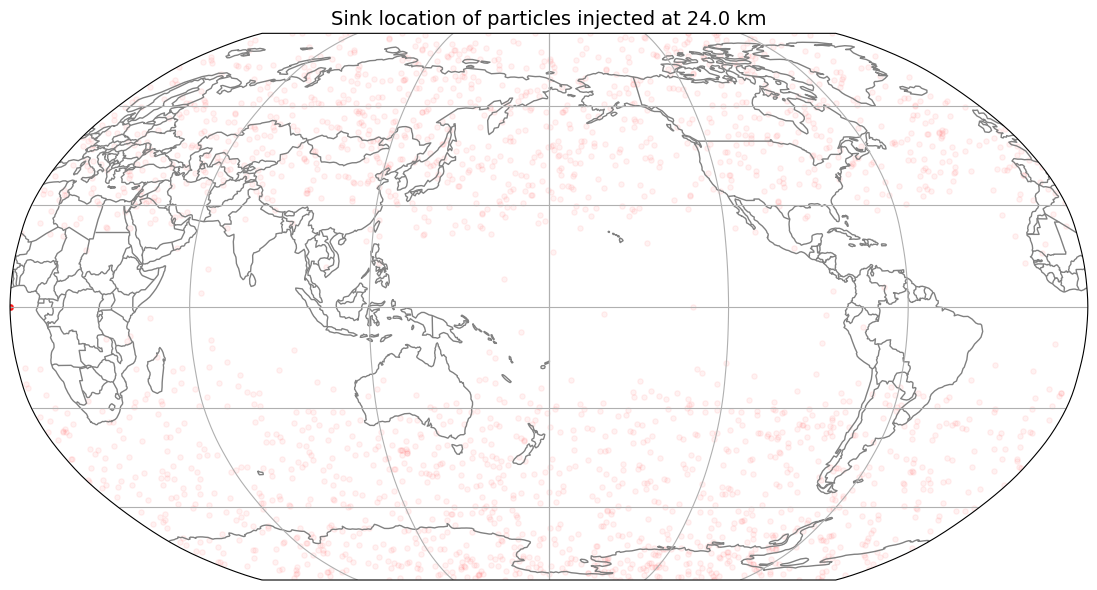

In [51]:
iz = 4

fig = plt.figure(figsize=(12,6), dpi=100)

ax1 = fig.add_subplot(1,1,1, projection=crs.Robinson(central_longitude=180))
ax1.set_global()
ax1.add_feature(cfeature.COASTLINE, edgecolor="grey")
ax1.add_feature(cfeature.BORDERS, edgecolor="grey")
ax1.gridlines()


xx1=Lon1[iz,:,:,:,:,:]
yy1=Lat1[iz,:,:,:,:,:]
    
    
# print(xx1)
# print(yy1)
# xx2=data2[1,7:14,25:30,i,1] # data[::36,i*8,1]
# yy2=data2[1,7:14,25:30,i,2] 
    
if i==0: 
    print('1:', xx1[0,:], yy1[:,0])
    print('2:', xx2[0,:], yy2[:,0])
    
ax1.scatter(x=xx1, y=yy1,
            color="red",
            s=15,
            alpha=0.05,
            transform=crs.PlateCarree()) ## Important
    
# ax1.scatter(x=xx2, y=yy2,
#             color="red",
#             s=15,
#             alpha=1.0,
#             transform=crs.PlateCarree()) ## Important

ax1.set_title(f'Sink location of particles injected at {np.round(Height[iz])} km', fontsize=14)

plt.tight_layout()
# plt.savefig(str(i+1)+'_xy.png', transparent=False, facecolor='w', edgecolor='w');
# plt.close();
# plt.clf();
# plt.cla();

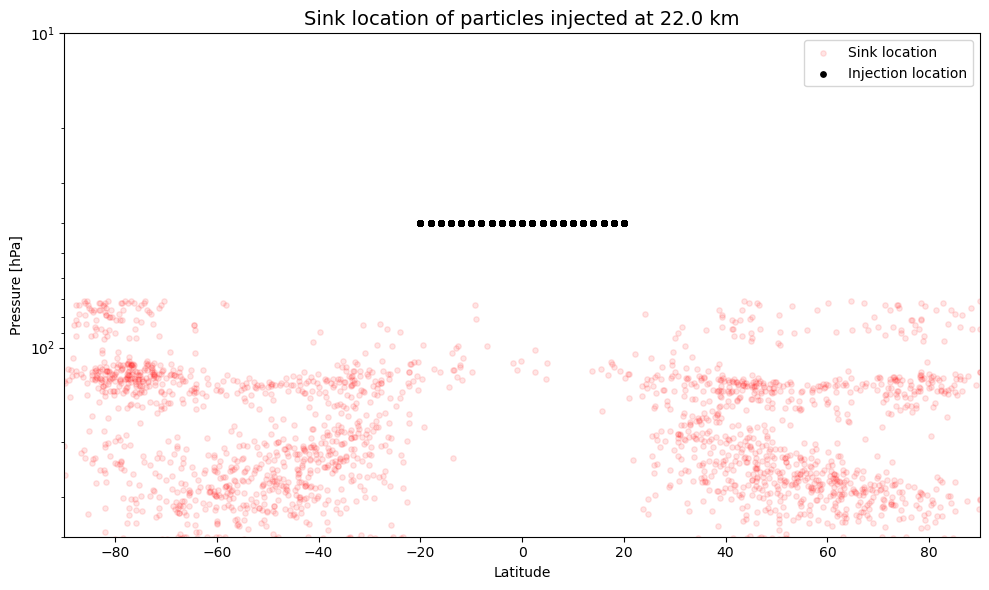

In [52]:
fig = plt.figure(figsize=(10,6), dpi=100)

ax1 = fig.add_subplot(1,1,1)
    
iz = 3

yy1=Lat1[iz,:,:,:,:,:]
zz1=Lev1[iz,:,:,:,:,:]
 
    
yy0=Lat0[iz,:,:,:,:,:]
zz0=Lev0[iz,:,:,:,:,:]

#     yy2=data2[1,7:14,25:30,it,2] # data[::36,i*8,1]
#     zz2=data2[1,7:14,25:30,it,3] 


ax1.scatter(x=yy1[:], 
            y=zz1[:],
            color="red", 
            alpha=0.1,
            label = 'Sink location',
            s=15) ## Important

ax1.scatter(x=yy0[:], 
            y=zz0[:],
            color="black", 
            label = 'Injection location',
            alpha=1,
            s=15) ## Important
    
#     ax1.scatter(x=yy2[:], y=zz2[:],
#             color="red", label='70 hPa',
#             s=15) ## Important
    
#     ax1.plot((-90,90),(75,75),'blue',alpha=0.2)
        

    
ax1.set_xlim([-90,90])
ax1.set_ylim([10, 400])
    
ax1.set_yscale('log')
plt.gca().invert_yaxis()
    
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Pressure [hPa]')
ax1.set_title(f'Sink location of particles injected at {np.round(Height[iz])} km', fontsize=14)

plt.legend()
plt.tight_layout()

(0.0, 3645.0)

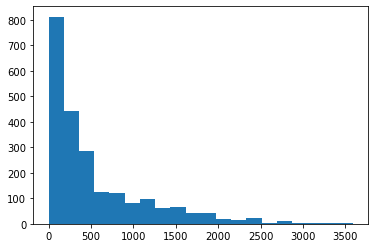

In [53]:
plt.hist(lifetime[1,:,:,:,:,:].flatten(), bins=20);

np.min(lifetime), np.max(lifetime)

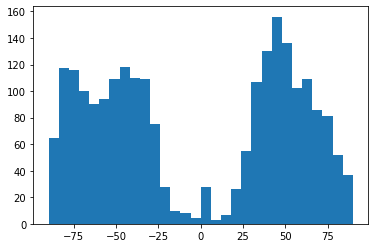

In [54]:
plt.hist(Lat1[4,:,:,:,:,:].flatten(), bins=30);

In [ ]:
plt.hist(Lev1[0,:,:,:,:,:].flatten(), bins=30);